In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bayes Theorem by hand

In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule), named after Reverend Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event. [1](https://plato.stanford.edu/archives/spr2019/entries/bayes-theorem/)

#### $$P(A|B) = \frac {P(B|A)P(A)}{P(B)}$$

I'm a visual learner. My favourite intuitive example of Bayes Theorem is this [using lego bricks](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego):

<img src="lego-probability-space.jpeg" width="400" height="400">

The image shows a 60 (6 * 10) lego unit area
 - 40 blue areas
 - 20 red areas
 - 6 intersecting yellow areas. 

We can work through the maths to determine the probabilities and conditional probabilities of each colour.

In [2]:
pBlue = 40/60
pRed = 20/60
pYellow = 6/60
pYellowRed = 4/20 # probabiity of Yellow given Red
pYellowBlue = 2 / 40 # probabiity of Yellow given Blue

print('Cond p(Yellow|Red) = {:.3f}'.format(pYellowRed))
print('Cond p(Yellow|Blue) = {:.3f}'.format(pYellowBlue))

Cond p(Yellow|Red) = 0.200
Cond p(Yellow|Blue) = 0.050


We now some baseline information for the probability and conditional probility of landing on each colour within the Legosphere. We can apply Bayes' theorem to generate estimates for "if we land on a yellow brick, what is the probability its red underneath?"

$$P(A|B) = \frac {P(B|A)P(A)}{P(B)}$$

$$P(Red|Yellow) = \frac {P(Yellow|Red)P(Red)}{P(Yellow)}$$

In [3]:
pRedYellow = pYellowRed*pRed/pYellow
print('Cond p(Red|Yellow) = {:.3f}'.format(pRedYellow))

Cond p(Red|Yellow) = 0.667


You may now be thinking, "wait so Bayes' rule is just the number of total number of Yellow pegs (6) over the number of yellow pegs on red squares (4)?". Well yes in this case it is, and as you can see follows intuition and logic given that we know everything about the legosphere. However, imagine that the lego brick image above is just one sample of a much larger lego board population. We can apply Baye's rule to infer and update our beliefs (probability estimates) about the board as more samples are taken. This is called Bayesian Inference.

## Bayesian Inference

The approach loosely follows:
 1. Set prior assumptions and establish "known knowns" of our data based on heuristics, historical or sample data. 
 1. Formalise a Mathematical Model of the problem space and prior assumptions.
 1. Formalise the Prior Distributions.
 1. Apply Bayes’ theorem to derive the posterior parameter values from observed sample data.
 1. Repeat steps 1-4 as more data samples are obtained.


To illustrate these steps we will use a simple coin-toss experiment to determine wether our coin is bias or not. 

#### 1. Prior Assumptions

Here we will establish some assumptions and heuristical rules for our coin. We have a reasonable assumption that our coin is fair. That is the prior probability of landing a tails is 0.5. However, we also some observational sample data for 50 tosses of the coin. And it looks as though fewer tails were observed than might have been expected. 

In [4]:
# prior belief of tails
prior = 0.5

# observation data
trials = 50
tails = 15
heads = trials-tails
print(f"Trials:\t{trials}\ntails:\t{tails}\nheads:\t{heads}")
print(f'Observed P(tails) = {tails/trials}')

Trials:	50
tails:	15
heads:	35
Observed P(tails) = 0.3


#### 2. The Mathematical Model

Now that we have obtained some sample data and qualitatively compared that to our prior assumption for landing a tails. We can build a mathematical model to represent our coin-tossing example. This model is devised to best capture the real-world physical processes, by means of their probability distribution parameters, that generate the observational data (i.e. the generative process of Heads and Tails). Naturally in many applications such as weather forecasting these models can become quite complex as the number of processes that drive the data, and therefore number of probability distributions in the model, is quite large. In our coin toss example we have a relatively simple world where given the probability of landing a head as θ:
$$P(Y=1|θ)=θ$$
the probability of landing a tails is then:
$$P(Y=0|θ)=1-θ$$

We also need to select appropriate probability distributions for each data or process inthe model (e.g. gaussian, log-normal, gamma, poisson etc). You may recall that a coin-toss is a single Bernoulli trial where each trial results in either: Success or Failure, Heads or Tails, Conversion or non-conersion, Survive or Die, you get the picture. The [binomial distribution](https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/) is the probability mass function of multiple indepenent [bernoulli trials](https://www.unf.edu/~cwinton/html/cop4300/s09/class.notes/DiscreteDist.pdf). Thus the binomial distribution describes the output of our coin toss observation data. 

To recap then. Our mathematical model is configured to determine the most likely value for our coin to produce a tails, theta, given the sample of observed data. Recalling Bayes' theorem this is:
 
$$P(θ|Data) = \frac {P(Data|θ)P(θ)}{P(Data)}$$

where $P(θ|Data)$ is the posterior probability of theta given the data . It is our updated "bayesian belief" for theta given by:
- the conditional probability of theta given the data P(Data|θ) multiplied by
- the prior distribution of theta P(θ) divided by
- the probability of the data P(Data)

Wait, wait, wait...you might now be wondering what a [conditional probability](https://en.wikipedia.org/wiki/Conditional_independence) is and how on earth do I get the likelihood of the data? 

The conditional probability in our case is simply the relationship between the occurence of two phenomena, namely landing a coin on Tails and the observed data. It is identical to the red and yellow lego bricks we saw above. And, if we had more variables in our coin toss model (e.g. red, blue, yellow lego) then conditional probability simply asserts that the probability of first order events (e.g. red and blue squares) may be dependent on the probability of second order events (e.g. yellow), but that the first order events do not influence each other. See also [this intuitive conditional probability example](https://math.stackexchange.com/questions/23093/could-someone-explain-conditional-independence) on Maths exchange.

The likelihood of the data $P(Data)$ then is the "*function that describes a hypersurface whose peak, if it exists, represents the combination of model parameter values that maximize the probability of drawing the sample obtained*" <sup>[wikipedia](https://en.wikipedia.org/wiki/Likelihood_function#Example)</sup>. For discrete bernoulli trials again this is the binomial distribution as shown in the figure below. 

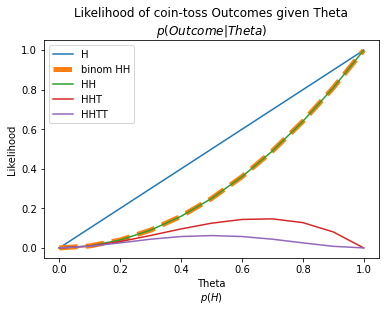

In [5]:
from scipy.stats import binom

# likelihood function of coin-toss outcomes given theta
X = np.arange(0,1.1,0.1) # thetas
plt.title('Likelihood of coin-toss Outcomes given Theta\n$p(Outcome|Theta)$')

plt.plot(X,[x for x in X],label='H') # likelihood p(H|x)
plt.plot(X,[binom.pmf(2,2,x) for x in X],label='binom HH',lw=5,linestyle='--') # binomial HH
plt.plot(X,[x**2 for x in X],label='HH') # likelihood p(HH|x)
plt.plot(X,[(x**2)*(1-x)for x in X],label='HHT') # likelihood p(HHT|x)
plt.plot(X,[(x**2)*(1-x)**2 for x in X],label='HHTT') # likelihood p(HHTT|x)

plt.xlabel('Theta\n$p(H)$')
plt.ylabel('Likelihood')
plt.legend();

#### 3. The Prior Distribution

We have set the assumption for our prior belief of landing a tails $P(θ)$ is 0.5 and follows a binomial distribution. But in the bayesian world we treat our assumptions as point estimates within possible range of values. So rather than using our single 0.5 point estimate, we represent $P(θ)$ as a prior probability distribution with varying levels of uncertainty.

Now, in practice we can choose any distribution we like here so long as its integral is equal to 1. There are also whats called "[conjucate-priors](https://en.wikipedia.org/wiki/Conjugate_prior)" where the selected prior distribution is in the same family as the posterior distribution and that naturally makes the maths and model interpretation much cleaner. But conceptually they key consideration for us here is to ensure that the "shape" of the prior distribution relfects our prior beliefs and or uncertainties for the data. 

Two applicable distributions are the [beta](https://en.wikipedia.org/wiki/Beta_distribution) and [triangle](https://en.wikipedia.org/wiki/Triangular_distribution) distributions. The beta distribution is commonly used to model percentages and probabilities, for instance in our case a beta-binomial distribution may be used and is in-fact a conjucate prior. But we could also use the trianlge distribution. This is common in business applications and problems where observational data is scarce such that probability distributions are based on expert judgement such as in risk management. 

Below we see the traingle and beta-binomial distributions to generate some estimates about our prior. The blue line represents the continuous beta-binomial priors, whereas the black stick-points are the triangle priors. In this case they are very similar.

In [6]:
def plot_p(ax,df,X,y,title,xlab='Theta',ylab='$P(θ)$',label=None):
    """to plot data frames as point probability plots"""
    ax.set_title(f'{title} {ylab}')
    ax.vlines(df[X],0,df[y],'k')
    ax.plot(df[X],df[y],'ko', lw=5, alpha=0.6,label=label)
    ax.set_xticks(df[X])
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab);

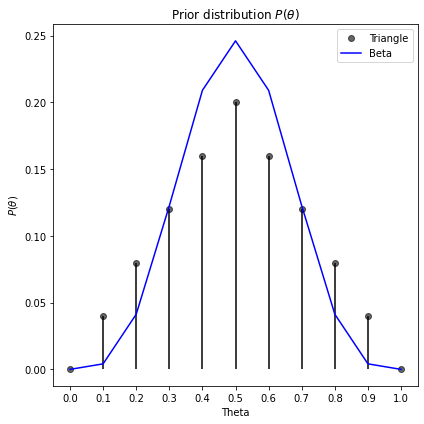

In [7]:
# prior estimates
from scipy.stats import triang, beta

theta = np.arange(0,1.1,.1)

# triangle priors
priors_t = triang.pdf(theta, prior)
priors_t = priors_t/sum(priors_t)
prior_df = pd.DataFrame({'theta':theta,'prior':priors_t})

# beta priors
priors_bb = beta.pdf(theta,5,5,)
priors_bb = priors_bb/sum(priors_bb)

fig,axs = plt.subplots(1,1,figsize=(6,6))
plot_p(axs,prior_df,'theta','prior','Prior distribution',label='Triangle')
axs.plot(theta,priors_bb,'b',label='Beta')
plt.legend()
plt.tight_layout()

#### 4. Apply Bayes Theorem on observtion data

We can now put this altogether to produce a posterior proability estimate. 

To illustrate the bayesian inference process lets first update our priors using just one toss of the coin. 

We toss our coin once and observe a tails. 

In [8]:
trials, tails, heads = 1,1,0
print(f"Trials: {trials}\nResult: T={tails} H={heads}")

Trials: 1
Result: T=1 H=0


Calling back to our model formula: 
$$P(θ|Data) = \frac {P(Data|θ)P(θ)}{P(Data)}$$

1. P(Data|θ) is given by the likelihood-function or equivalent binomial pmf for the sample.
1. P(θ) is the prior from our triangle or beta-binomial distribution.
1. P(Data) is the marginal likelihood or Bayes' "model evidence" of the data from the integrated product of the prior and likelihood. Beware that this may be termed differently depending on context ([see here](https://en.wikipedia.org/wiki/Marginal_likelihood)).

**Results from the first sample**<BR>
Below we see a table and plots showing the prior, likelihood and binomial , and posterior distributions for our first single coin toss observation.

In [9]:
df = pd.DataFrame({'tails':tails,
                   'heads':heads,
                   'theta':theta,
                   'prior':priors_bb,
                   'likelihood':[(x**tails) * (1-x)**heads for x in theta],
                   'binom':binom.pmf(tails,trials,theta),
                  })

df['marginal'] = np.sum(df['likelihood']*df['prior'])
df['posterior'] = (df['likelihood']*df['prior']) / df['marginal']
df

,tails,heads,theta,prior,likelihood,binom,marginal,posterior
0,1,0,0.0,0.000000,0.0,0.0,0.5,0.000000
1,1,0,0.1,0.004133,0.1,0.1,0.5,0.000827
2,1,0,0.2,0.041287,0.2,0.2,0.5,0.016515
3,1,0,0.3,0.122521,0.3,0.3,0.5,0.073512
4,1,0,0.4,0.209015,0.4,0.4,0.5,0.167212
5,1,0,0.5,0.246089,0.5,0.5,0.5,0.246089
6,1,0,0.6,0.209015,0.6,0.6,0.5,0.250818
7,1,0,0.7,0.122521,0.7,0.7,0.5,0.171529
8,1,0,0.8,0.041287,0.8,0.8,0.5,0.066059
9,1,0,0.9,0.004133,0.9,0.9,0.5,0.007440


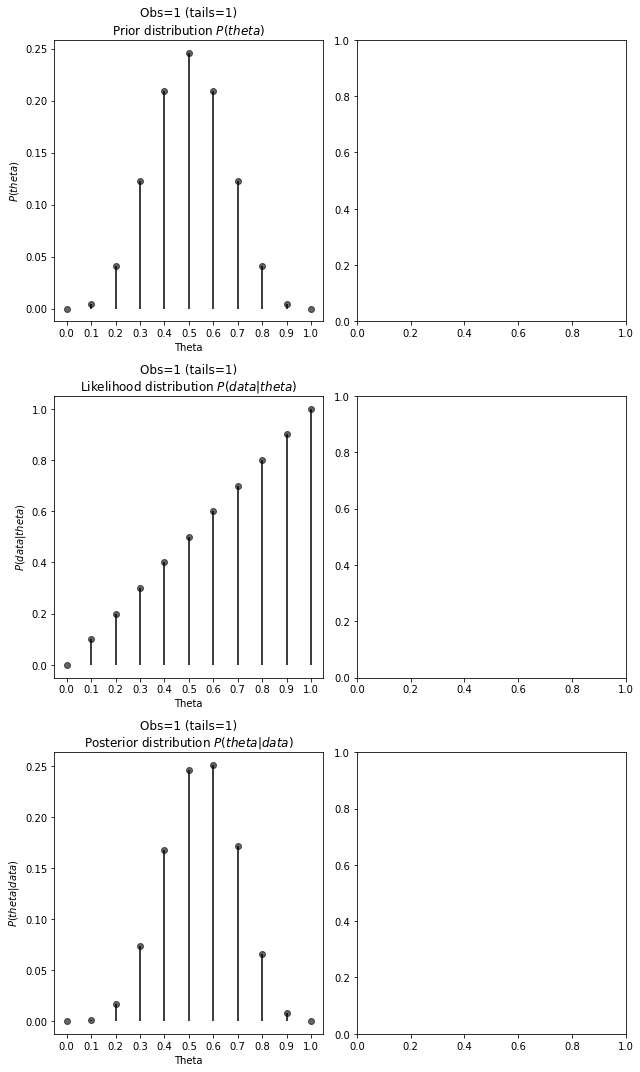

In [10]:
fig,axs = plt.subplots(3,2,figsize=(9,15))
plot_p(axs[0,0],df,'theta','prior','Obs=1 (tails=1)\nPrior distribution',ylab='$P(theta)$')
plot_p(axs[1,0],df,'theta','likelihood','Obs=1 (tails=1)\nLikelihood distribution',ylab='$P(data|theta)$')
plot_p(axs[2,0],df,'theta','posterior','Obs=1 (tails=1)\nPosterior distribution',ylab='$P(theta|data)$')

plt.tight_layout()

Comparing the prior and posterior distributions shows very little difference, particularly in where theta is in the range of 0.4 to 0.6 where our prior estimate was "strongest". Examining the posterior distribution we see a peak at 0.5, in line with our prior belief in the triangle distribution. Note also that the likelihood function does not really inform the model given that this sample, or "model evidence", is a single toss of the coin.

We can approximate [credible intervals (CI)](https://en.wikipedia.org/wiki/Credible_interval#Choosing_a_credible_interval) to quantify the posterior distribution. For instance we see that:
- 99 % CI that theta is between 0.2 and 0.8.
- 41 % CI that theta is between 0.4 and 0.6

Similarly we can use the integral of the area under curve to show that:
- P(θ|data) > 0.4 is 91%.

In [11]:
c1,c2,p1 = (
        df.loc[(df['theta']>=0.2)&(df['theta']<=0.8),'posterior'].sum(),
        df.loc[(df['theta']>=0.4)&(df['theta']<=0.6),'posterior'].sum(),
        df.loc[(df['theta']>=0.4),'posterior'].sum()
)
print(f"CI 0.2-0.8 = {c1:.2f}\nCI 0.4-0.6 = {c2:.2f}\nP(theta|data)>0.4 = {p1:.2f}")

CI 0.2-0.8 = 0.99
CI 0.4-0.6 = 0.41
P(theta|data)>0.4 = 0.91


**Results from a second sample**

Let's now include all of our  observation data (n=50) and update the posterior distribution once more. 

Note that if we were pursuing true Bayesian Inference then we would infact update our first posterior estimate with this new data. Thus the posterior from our first sample (n=1) estimate becomes our prior in the (n=50) sample and so on. 

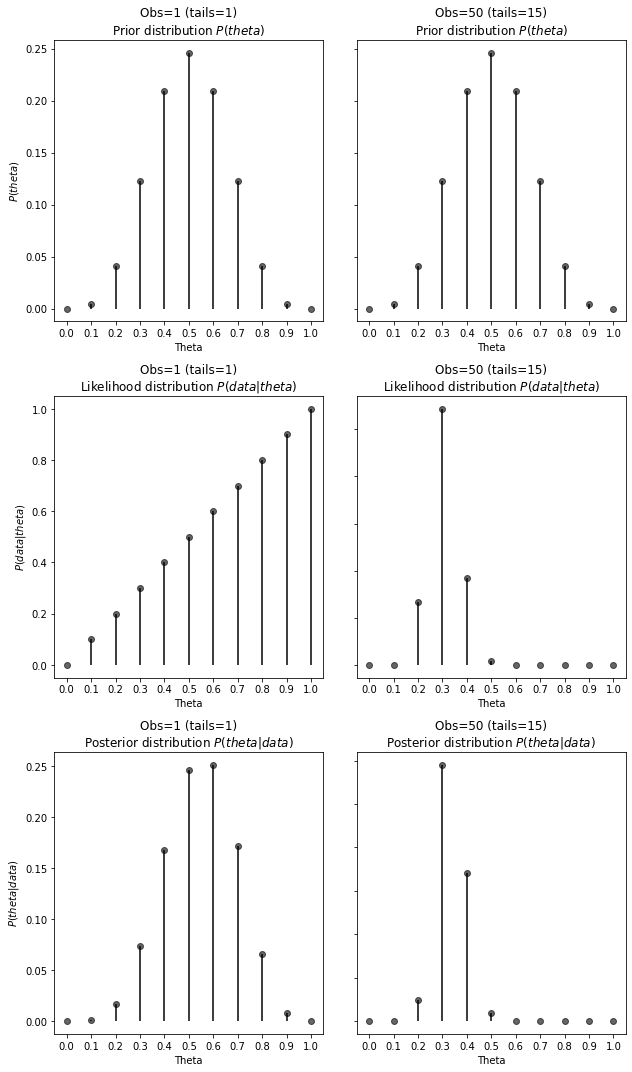

<Figure size 432x288 with 0 Axes>

In [12]:
# observation data
trials = 50
tails = 15
heads = trials-tails

df = pd.DataFrame({'tails':tails,
                   'heads':heads,
                   'theta':theta,
                   'prior':priors_bb,
                   'likelihood':[(x**tails) * (1-x)**heads for x in theta],
                   'binom':binom.pmf(tails,trials,theta),
                  })
df['marginal'] = np.sum(df['likelihood']*df['prior'])
df['posterior'] = (df['likelihood']*df['prior']) / df['marginal']
plot_p(axs[0,1],df,'theta','prior',f'Obs={trials} (tails={tails})\nPrior distribution',ylab='$P(theta)$')
plot_p(axs[1,1],df,'theta','likelihood',f'Obs={trials} (tails={tails})\nLikelihood distribution',ylab='$P(data|theta)$')
plot_p(axs[2,1],df,'theta','posterior',f'Obs={trials} (tails={tails})\nPosterior distribution',ylab='$P(theta|data)$')

for ax in axs[:,1]:
    ax.set_ylabel('')
    ax.set_yticklabels('')

plt.tight_layout();
fig

Now we clearly see that with our updated observations (n=50) our coin is very likely bias to heads. The likelihood and posterior distributions for a tails result peak around theta values of 0.3. 

Again, this is confirmed  by checking the Credible Intervals and integrals.

In [13]:
c1,c2,p1 = (
        df.loc[(df['theta']>=0.2)&(df['theta']<=0.8),'posterior'].sum(),
        df.loc[(df['theta']>=0.4)&(df['theta']<=0.6),'posterior'].sum(),
        df.loc[(df['theta']>=0.4),'posterior'].sum()
)
print(f"CI 0.2-0.8 = {c1:.2f}\nCI 0.4-0.6 = {c2:.2f}\nP(theta|data)>0.4 = {p1:.2f}")

CI 0.2-0.8 = 1.00
CI 0.4-0.6 = 0.36
P(theta|data)>0.4 = 0.36


### Conclusion

In this post I have recapped on Bayes theorem, and shown how to manually apply bayes theorem for bayesian inference of the binomial distribution on a coin tossing example.

### References

- https://ro-che.info/articles/2016-06-14-predicting-coin-toss
- https://www.vosesoftware.com/riskwiki/Bayesiananalysisexampleidentifyingaweightedcoin.php
- https://www.analyticsvidhya.com/blog/2016/06/bayesian-statistics-beginners-simple-english/
- https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348
- https://www.ritchievink.com/blog/2019/06/10/bayesian-inference-how-we-are-able-to-chase-the-posterior/
- https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood
- https://en.wikipedia.org/wiki/Credible_interval#Choosing_a_credible_interval

